# Import Packages and Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
import seaborn as sns
warnings.filterwarnings("ignore")
from datetime import datetime

In [2]:
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from xgboost.sklearn import XGBClassifier
from lightgbm import LGBMClassifier
import copy
from sklearn.model_selection import train_test_split
import math
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import f1_score

# Loading the data

In [3]:
train = pd.read_csv('Train.csv')
test = pd.read_csv('Test.csv')

In [4]:
train_original = train.copy()
test_original = test.copy()

# Understanding the data

In [5]:
train.head()

,loan_id,source,financial_institution,interest_rate,unpaid_principal_bal,loan_term,origination_date,first_payment_date,loan_to_value,number_of_borrowers,...,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13
0,268055008619,Z,"Turner, Baldwin and Rhodes",4.250,214000,360,2012-03-01,05/2012,95,1.0,...,0,0,0,1,0,0,0,0,0,1
1,672831657627,Y,"Swanson, Newton and Miller",4.875,144000,360,2012-01-01,03/2012,72,1.0,...,0,0,0,0,0,0,0,1,0,1
2,742515242108,Z,Thornton-Davis,3.250,366000,180,2012-01-01,03/2012,49,1.0,...,0,0,0,0,0,0,0,0,0,1
3,601385667462,X,OTHER,4.750,135000,360,2012-02-01,04/2012,46,2.0,...,0,0,0,0,0,1,1,1,1,1
4,273870029961,X,OTHER,4.750,124000,360,2012-02-01,04/2012,80,1.0,...,3,4,5,6,7,8,9,10,11,1


In [6]:
test.head()

,loan_id,source,financial_institution,interest_rate,unpaid_principal_bal,loan_term,origination_date,first_payment_date,loan_to_value,number_of_borrowers,...,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12
0,1,Y,Browning-Hart,3.875,417000,360,01/02/12,Apr-12,75,1,...,0,0,0,0,0,0,0,0,0,0
1,2,X,OTHER,4.500,113000,360,01/02/12,Apr-12,80,2,...,0,0,0,0,0,0,0,0,0,0
2,3,Y,OTHER,4.500,72000,360,01/01/12,Mar-12,75,1,...,0,0,0,0,0,0,0,0,0,0
3,4,X,"Miller, Mcclure and Allen",4.125,123000,180,01/02/12,Apr-12,41,2,...,0,0,0,0,0,0,0,0,0,0
4,5,X,Browning-Hart,3.250,166000,180,01/02/12,Apr-12,53,2,...,0,0,0,0,0,0,0,0,0,0


In [7]:
train.shape, test.shape

((116058, 29), (35866, 28))

In [8]:
train.dtypes

loan_id                       int64
source                       object
financial_institution        object
interest_rate               float64
unpaid_principal_bal          int64
loan_term                     int64
origination_date             object
first_payment_date           object
loan_to_value                 int64
number_of_borrowers         float64
debt_to_income_ratio        float64
borrower_credit_score       float64
loan_purpose                 object
insurance_percent           float64
co-borrower_credit_score    float64
insurance_type              float64
m1                            int64
m2                            int64
m3                            int64
m4                            int64
m5                            int64
m6                            int64
m7                            int64
m8                            int64
m9                            int64
m10                           int64
m11                           int64
m12                         

In [9]:
test.dtypes

loan_id                       int64
source                       object
financial_institution        object
interest_rate               float64
unpaid_principal_bal          int64
loan_term                     int64
origination_date             object
first_payment_date           object
loan_to_value                 int64
number_of_borrowers           int64
debt_to_income_ratio          int64
borrower_credit_score         int64
loan_purpose                 object
insurance_percent             int64
co-borrower_credit_score      int64
insurance_type                int64
m1                            int64
m2                            int64
m3                            int64
m4                            int64
m5                            int64
m6                            int64
m7                            int64
m8                            int64
m9                            int64
m10                           int64
m11                           int64
m12                         

In [10]:
train.isnull().sum()

loan_id                     0
source                      0
financial_institution       0
interest_rate               0
unpaid_principal_bal        0
loan_term                   0
origination_date            0
first_payment_date          0
loan_to_value               0
number_of_borrowers         0
debt_to_income_ratio        0
borrower_credit_score       0
loan_purpose                0
insurance_percent           0
co-borrower_credit_score    0
insurance_type              0
m1                          0
m2                          0
m3                          0
m4                          0
m5                          0
m6                          0
m7                          0
m8                          0
m9                          0
m10                         0
m11                         0
m12                         0
m13                         0
dtype: int64

In [11]:
test.isnull().sum()

loan_id                     0
source                      0
financial_institution       0
interest_rate               0
unpaid_principal_bal        0
loan_term                   0
origination_date            0
first_payment_date          0
loan_to_value               0
number_of_borrowers         0
debt_to_income_ratio        0
borrower_credit_score       0
loan_purpose                0
insurance_percent           0
co-borrower_credit_score    0
insurance_type              0
m1                          0
m2                          0
m3                          0
m4                          0
m5                          0
m6                          0
m7                          0
m8                          0
m9                          0
m10                         0
m11                         0
m12                         0
dtype: int64

# Origination Date

In [12]:
train['origination_date'] = pd.to_datetime(train['origination_date'],format='%Y-%m-%d')
test['origination_date'] = pd.to_datetime(test['origination_date'], format='%d/%m/%y')

In [13]:
train['orig_month'] = train['origination_date'].dt.month
train['orig_year'] = train['origination_date'].dt.year

test['orig_month'] = test['origination_date'].dt.month
test['orig_year'] = test['origination_date'].dt.year

# First Payment Data

In [14]:
train['first_payment_date'] = pd.to_datetime(train['first_payment_date'])

In [15]:
train['fp_month'] = train['first_payment_date'].dt.month
train['fp_year'] = train['first_payment_date'].dt.year

In [16]:
test['first_payment_date'].value_counts()

Apr-12    16551
Mar-12    14661
May-12     4510
Feb-12      144
Name: first_payment_date, dtype: int64

In [17]:
test['first_payment_date'] = pd.to_datetime(test.first_payment_date, format='%b-%y')

In [18]:
test['fp_month'] = test['first_payment_date'].dt.month
test['fp_year'] = test['first_payment_date'].dt.year

In [19]:
test.shape, train.shape

((35866, 32), (116058, 33))

# source

In [20]:
train['source'].describe()

count     116058
unique         3
top            X
freq       63858
Name: source, dtype: object

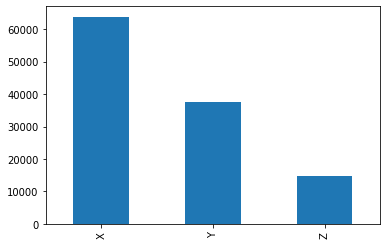

In [21]:
train['source'].value_counts().plot.bar()

In [22]:
label_encoder = preprocessing.LabelEncoder()

In [23]:
train['source'] = label_encoder.fit_transform(train['source'])
test['source'] = label_encoder.fit_transform(test['source'])

In [24]:
train['source'].unique()

array([2, 1, 0], dtype=int64)

# financial_institution

In [25]:
train['financial_institution'].value_counts()

OTHER                          49699
Browning-Hart                  31852
Swanson, Newton and Miller      6874
Edwards-Hoffman                 4857
Martinez, Duffy and Bird        4715
Miller, Mcclure and Allen       3158
Nicholson Group                 2116
Turner, Baldwin and Rhodes      1846
Suarez Inc                      1790
Cole, Brooks and Vincent        1642
Richards-Walters                1459
Taylor, Hunt and Rodriguez      1259
Sanchez-Robinson                1193
Sanchez, Hays and Wilkerson      853
Romero, Woods and Johnson        750
Thornton-Davis                   651
Anderson-Taylor                  483
Richardson Ltd                   473
Chapman-Mcmahon                  388
Name: financial_institution, dtype: int64

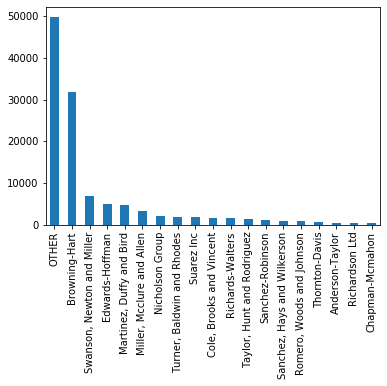

In [26]:
train['financial_institution'].value_counts().plot.bar()

In [27]:
train['financial_institution'] = label_encoder.fit_transform(train['financial_institution'])
test['financial_institution'] = label_encoder.fit_transform(test['financial_institution'])

In [28]:
train['financial_institution'].unique()

array([18, 15, 17,  8,  1, 10,  4,  9,  5,  6,  0, 16,  7,  3, 12, 13, 14,
       11,  2], dtype=int64)

# interest_rate

In [29]:
train['interest_rate'].describe()

count    116058.000000
mean          3.868961
std           0.461020
min           2.250000
25%           3.500000
50%           3.875000
75%           4.125000
max           6.750000
Name: interest_rate, dtype: float64

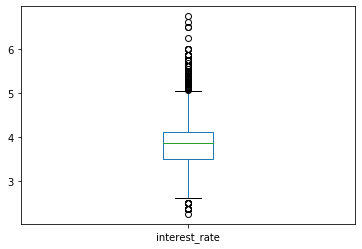

In [30]:
train['interest_rate'].plot.box()

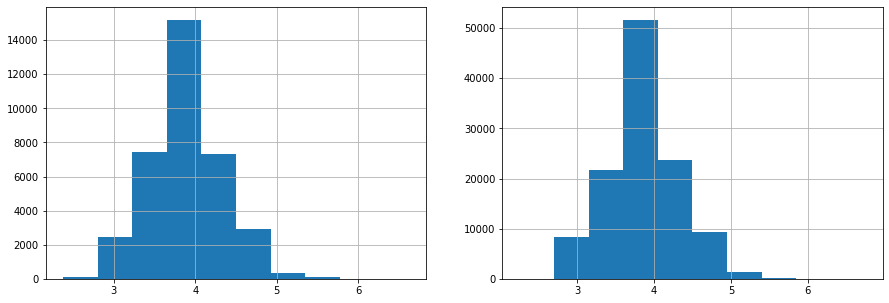

In [31]:
fig, axarr = plt.subplots(1,2, figsize=(15, 5))
test['interest_rate'].hist(ax=axarr[0])
train['interest_rate'].hist(ax=axarr[1])

# unpaid_principal_bal

In [32]:
train['unpaid_principal_bal'].describe()

count    1.160580e+05
mean     2.082262e+05
std      1.146851e+05
min      1.100000e+04
25%      1.200000e+05
50%      1.830000e+05
75%      2.780000e+05
max      1.200000e+06
Name: unpaid_principal_bal, dtype: float64

train['unpaid_principal_bal'] = np.log(train['unpaid_principal_bal'])
test['unpaid_principal_bal'] = np.log(test['unpaid_principal_bal'])

In [33]:
train['unpaid_principal_bal'].describe()

count    1.160580e+05
mean     2.082262e+05
std      1.146851e+05
min      1.100000e+04
25%      1.200000e+05
50%      1.830000e+05
75%      2.780000e+05
max      1.200000e+06
Name: unpaid_principal_bal, dtype: float64

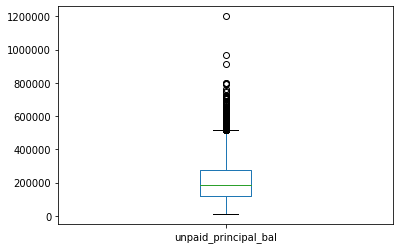

In [34]:
train['unpaid_principal_bal'].plot.box()

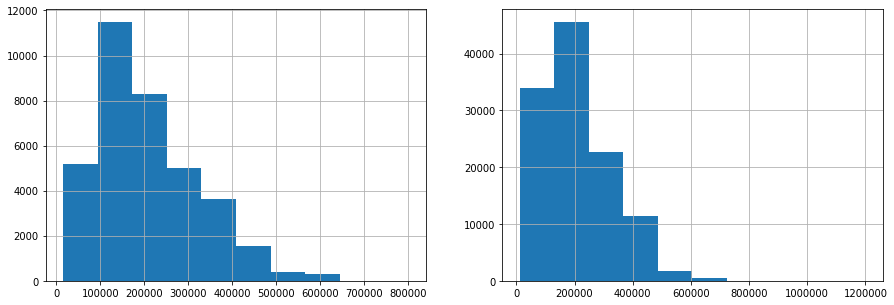

In [35]:
fig, axarr = plt.subplots(1,2, figsize=(15, 5))
test['unpaid_principal_bal'].hist(ax=axarr[0])
train['unpaid_principal_bal'].hist(ax=axarr[1])

In [36]:
train.columns

Index(['loan_id', 'source', 'financial_institution', 'interest_rate',
       'unpaid_principal_bal', 'loan_term', 'origination_date',
       'first_payment_date', 'loan_to_value', 'number_of_borrowers',
       'debt_to_income_ratio', 'borrower_credit_score', 'loan_purpose',
       'insurance_percent', 'co-borrower_credit_score', 'insurance_type', 'm1',
       'm2', 'm3', 'm4', 'm5', 'm6', 'm7', 'm8', 'm9', 'm10', 'm11', 'm12',
       'm13', 'orig_month', 'orig_year', 'fp_month', 'fp_year'],
      dtype='object')

# loan_term

In [37]:
train['loan_term'].describe()

count    116058.000000
mean        292.280997
std          89.762415
min          60.000000
25%         180.000000
50%         360.000000
75%         360.000000
max         360.000000
Name: loan_term, dtype: float64

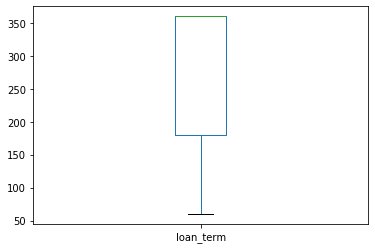

In [38]:
train['loan_term'].plot.box()

train['loan_term'] = np.log(train['loan_term'])
test['loan_term'] = np.log(test['loan_term'])

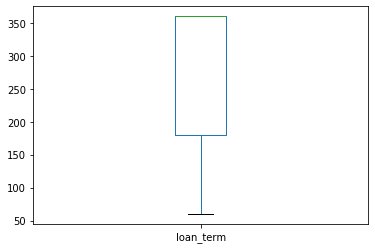

In [39]:
train['loan_term'].plot.box()

# loan_to_value

In [40]:
train['loan_to_value'].describe()

count    116058.000000
mean         67.431939
std          17.291719
min           6.000000
25%          57.000000
50%          72.000000
75%          80.000000
max          97.000000
Name: loan_to_value, dtype: float64

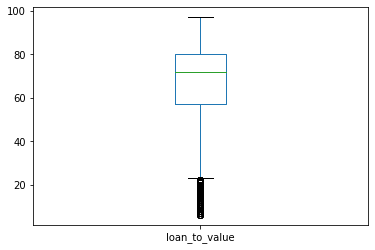

In [41]:
train['loan_to_value'].plot.box()

train['loan_to_value'] = np.sqrt(train['loan_to_value'])
test['loan_to_value'] = np.sqrt(test['loan_to_value'])

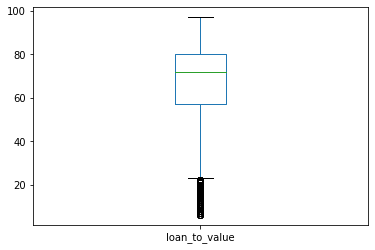

In [42]:
train['loan_to_value'].plot.box()

# number_of_borrowers

In [43]:
train['number_of_borrowers'].value_counts()

2.0    68844
1.0    47214
Name: number_of_borrowers, dtype: int64

# debt_to_income_ratio

In [44]:
train['debt_to_income_ratio'].describe()

count    116058.000000
mean         30.742293
std           9.730798
min           1.000000
25%          23.000000
50%          31.000000
75%          39.000000
max          64.000000
Name: debt_to_income_ratio, dtype: float64

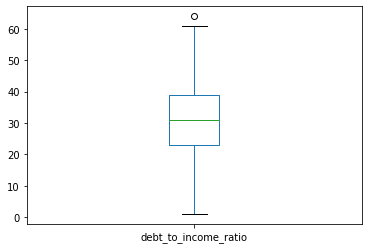

In [45]:
train['debt_to_income_ratio'].plot.box()

train['debt_to_income_ratio'] = np.log(train['debt_to_income_ratio'])
test['debt_to_income_ratio'] = np.log(test['debt_to_income_ratio'])

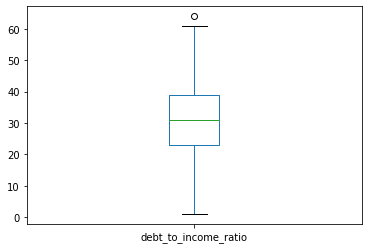

In [46]:
train['debt_to_income_ratio'].plot.box()

# borrower_credit_score

In [47]:
train['borrower_credit_score'].describe()

count    116058.000000
mean        769.926778
std          42.210706
min           0.000000
25%         751.000000
50%         782.000000
75%         800.000000
max         840.000000
Name: borrower_credit_score, dtype: float64

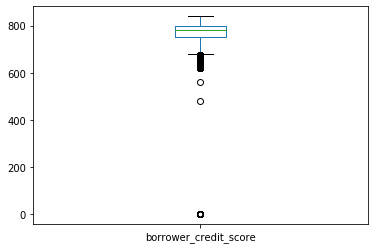

In [48]:
train['borrower_credit_score'].plot.box()

# loan_purpose

In [49]:
train['loan_purpose'].describe()

count     116058
unique         3
top          A23
freq       58462
Name: loan_purpose, dtype: object

In [50]:
train['loan_purpose'].value_counts()

A23    58462
B12    29383
C86    28213
Name: loan_purpose, dtype: int64

In [51]:
train['loan_purpose'] = label_encoder.fit_transform(train['loan_purpose'])
test['loan_purpose'] = label_encoder.fit_transform(test['loan_purpose'])

In [52]:
train['loan_purpose'].unique()

array([2, 1, 0], dtype=int64)

# insurance_percent

In [53]:
train['insurance_percent'].describe()

count    116058.000000
mean          2.786288
std           8.096464
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          40.000000
Name: insurance_percent, dtype: float64

In [54]:
train['insurance_percent'].value_counts()

0.0     102455
30.0      5113
25.0      4885
12.0      2493
6.0        701
35.0       372
16.0        18
18.0        12
20.0         3
17.0         2
15.0         1
39.0         1
22.0         1
40.0         1
Name: insurance_percent, dtype: int64

# co-borrower_credit_score

In [55]:
train['co-borrower_credit_score'].describe()

count    116058.000000
mean        459.611565
std         381.946926
min           0.000000
25%           0.000000
50%         740.000000
75%         791.000000
max         836.000000
Name: co-borrower_credit_score, dtype: float64

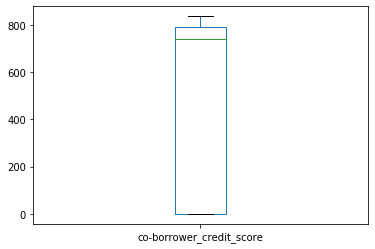

In [56]:
train['co-borrower_credit_score'].plot.box()

# insurance_type 

In [57]:
train['insurance_type'].value_counts()

0.0    115680
1.0       378
Name: insurance_type, dtype: int64

# Standard Scaler Preprocessing

In [58]:
train.columns

Index(['loan_id', 'source', 'financial_institution', 'interest_rate',
       'unpaid_principal_bal', 'loan_term', 'origination_date',
       'first_payment_date', 'loan_to_value', 'number_of_borrowers',
       'debt_to_income_ratio', 'borrower_credit_score', 'loan_purpose',
       'insurance_percent', 'co-borrower_credit_score', 'insurance_type', 'm1',
       'm2', 'm3', 'm4', 'm5', 'm6', 'm7', 'm8', 'm9', 'm10', 'm11', 'm12',
       'm13', 'orig_month', 'orig_year', 'fp_month', 'fp_year'],
      dtype='object')

In [59]:
cols = ['borrower_credit_score','borrower_credit_score','insurance_percent','debt_to_income_ratio',
       'loan_to_value','loan_term','unpaid_principal_bal','interest_rate']
scaler = preprocessing.StandardScaler().fit(train[cols])
train[cols] = scaler.transform(train[cols])
test[cols] = scaler.transform(test[cols])
print(scaler.mean_)

[7.69926778e+02 7.69926778e+02 2.78628789e+00 3.07422926e+01
 6.74319392e+01 2.92280997e+02 2.08226223e+05 3.86896072e+00]


# Building Model

In [60]:
xtrain = train.drop(['loan_id','m13','origination_date','first_payment_date'], axis=1)
ytrain = train['m13']

xtest = test.drop(['loan_id','origination_date','first_payment_date'], axis=1)

In [61]:
x_train, x_valid, y_train, y_valid = train_test_split(xtrain, ytrain, test_size = 0.20)

In [62]:
classifier = LinearDiscriminantAnalysis()

In [63]:
classifier.fit(x_train, y_train)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)

In [64]:
predict_valid = classifier.predict(x_valid)
f1_score(predict_valid, y_valid) * 100

51.8867924528302

In [65]:
predict_test = classifier.predict(xtest)

In [66]:
submission = pd.DataFrame()
submission['loan_id'] = test_original['loan_id']
submission['m13'] = predict_test
submission.to_csv('sample.csv', index=False)

In [67]:
classifier.score(x_train, y_train)

0.9952394287314478

In [68]:
0.9953040721018801

0.9953040721018801

In [69]:
train.tail()

,loan_id,source,financial_institution,interest_rate,unpaid_principal_bal,loan_term,origination_date,first_payment_date,loan_to_value,number_of_borrowers,...,m8,m9,m10,m11,m12,m13,orig_month,orig_year,fp_month,fp_year
116053,382119962287,1,1,0.555378,-0.481549,0.754428,2012-02-01,2012-04-01,1.189480,2.0,...,0,0,0,0,0,0,2,2012,4,2012
116054,582803915466,2,8,-1.884874,-0.507707,-1.919308,2012-01-01,2012-03-01,-1.875584,1.0,...,0,0,0,0,0,0,1,2012,3,2012
116055,837922316947,0,8,0.013100,-0.368194,0.754428,2012-02-01,2012-04-01,-0.545462,2.0,...,0,0,0,0,0,0,2,2012,4,2012
116056,477343182138,0,8,0.826517,-0.342036,0.754428,2012-02-01,2012-04-01,0.379840,2.0,...,0,0,0,0,0,0,2,2012,4,2012
116057,763308490661,2,17,-1.071456,0.381688,-1.250874,2012-01-01,2012-03-01,-2.222573,2.0,...,0,0,0,0,0,0,1,2012,3,2012


In [70]:
train['origination_date'].max(), train['origination_date'].min()

(Timestamp('2012-03-01 00:00:00'), Timestamp('2012-01-01 00:00:00'))